<a href="https://www.kaggle.com/code/francescoliveras/ps-s4-e2-eda-model-en-es?scriptVersionId=161300264" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#37FABC; font-size:160%; text-align:center;padding: 0px; border-bottom: 5px solid #407A68">PlayGround Series S4 E2 EDA and simple model</p>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 5px solid #008F77">Intro</p>

**🟦EN**:
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; color:#5361fc;">
This Kaggle workbook aims to provide a comprehensive exploratory data analysis (EDA) and a set of simple models (which will not be optimized), but which can give a vague idea of how to choose the best model for the given data set, with the ultimate goal of making decisions.
Through this EDA, we will be able to get a deeper understanding of the structure of the data, the values that have a relationship between them and the missing values and pattern or outliers that may affect when performing the modeling or selecting the model we want to use for prediction/recommendation. By performing an EDA, we can identify potential pitfalls and make the decisions and subsequent processing necessary to improve the performance and accuracy of the models.
</div>

**🟥ES**: 
<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #c9b1fa; color:#38196e;">
Este cuaderno Kaggle tiene el objetivo proporcionar un análisis exploratorio de datos (AED) exhaustivo y un conjunto de modelos simples (los cuales no estarán optimizados), pero que pueden llegar a dar una vaga idea para escoger el mejor modelo, para el conjunto de datos dado, con el objetivo final de tomar decisiones.

A través de este AED, podremos obtener una comprensión más profunda de la estructura de los datos, los valores que tiene una relación entre ellos y los valores que faltan y patrón o valores anómalos que pueda afectar a la hora de realizar el modelado o seleccionar el modelo que queremos utilizar para la predicción / recomendación. Al realizar un EDA, podemos identificar posibles obstáculos y tomar las decisiones, y posteriormente el procesado necesario para mejorar el rendimiento y la precisión de los modelos.
</div>

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Data information</p>

**🟦EN**:

The data consist of the estimation of obesity levels in people from the countries of Mexico, Peru and Colombia, with ages between 14 and 61 and diverse eating habits and physical condition , data was collected using a web platform with a survey where anonymous users answered each question, then the information was processed obtaining 17 attributes and 2111 records.
The attributes related with eating habits are:

* Frequent consumption of high caloric food (FAVC)
* Frequency of consumption of vegetables (FCVC)
* Number of main meals (NCP)
* Consumption of food between meals (CAEC)
* Consumption of water daily (CH20)
* Consumption of alcohol (CALC).

The attributes related with the physical condition are: 

* Calories consumption monitoring (SCC)
* Physical activity frequency (FAF)
* Time using technology devices (TUE)
* Transportation used (MTRANS)

variables obtained :

* Gender
* Age
* Height
* Weight

NObesity values are:

* Underweight Less than 18.5
* Normal 18.5 to 24.9
* Overweight 25.0 to 29.9
* Obesity I 30.0 to 34.9
* Obesity II 35.0 to 39.9
* Obesity III Higher than 40

The data contains numerical data and continous data, so it can be used for analysis based on algorithms of classification, prediction, segmentation and association. Data is available in CSV format.

### Files

* ```train.csv``` - the training dataset; NObeyesdad is the categorical target
* ```test.csv``` - the test dataset; your objective is to predict the class of NObeyesdad for each row
* ```sample_submission.csv``` - a sample submission file in the correct format


**🟥ES**:

Los datos consisten en la estimación de los niveles de obesidad en personas de los países de México, Perú y Colombia, con edades entre 14 y 61 años y diversos hábitos alimenticios y condición física , los datos fueron recolectados utilizando una plataforma web con una encuesta donde usuarios anónimos respondieron cada pregunta, posteriormente la información fue procesada obteniendo 17 atributos y 2111 registros. Los atributos relacionados con los hábitos alimentarios son:

* Frecuencia de consumo de alimentos con alto contenido calórico (FAVC)
* Frecuencia de consumo de verduras (FCVC)
* Número de comidas principales (NCP)
* Consumo de alimentos entre comidas (CAEC)
* Consumo de agua diario (CH20)
* Consumo de alcohol (CALC).

Los atributos relacionados con la condición física son: 

* Seguimiento del consumo de calorías (SCC) 
* Frecuencia de actividad física (FAF)
* Tiempo de uso de dispositivos tecnológicos (TUE)
* Transporte utilizado (MTRANS) 

Variables obtenidas : 

* Sexo
* Edad
* Altura 
* Peso

Los valores de NObesidad son:

* Bajo peso Menos de 18,5
* Normal 18,5 a 24,9
* Sobrepeso 25.0 a 29.9
* Obesidad I 30,0 a 34,9
* Obesidad II 35,0 a 39,9
* Obesidad III Superior a 40

Los datos contienen datos numéricos y datos continuos, por lo que pueden utilizarse para análisis basados en algoritmos de clasificación, predicción, segmentación y asociación. Los datos están disponibles en formato CSV.

Archivos
* ```train.csv``` - el conjunto de datos de entrenamiento; NObeyesdad es el objetivo categórico
* ```test.csv``` - el conjunto de datos de prueba; su objetivo es predecir la clase de NObeyesdad para cada fila
* ```sample_submission.csv``` - un archivo de envío de muestra en el formato correcto

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Library import</p>

In [1]:
import os 
import sys
import math
import time
import random
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import missingno as msno
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import matplotlib.colors as mcolors

from xgboost import XGBClassifier
from itertools import combinations
from lightgbm import LGBMClassifier
from sklearn.impute import KNNImputer
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV



In [2]:
# Put theme of notebook 
from colorama import Fore, Style

# Colors
red = Fore.RED + Style.BRIGHT
mgta = Fore.MAGENTA + Style.BRIGHT
yllw = Fore.YELLOW + Style.BRIGHT
cyn = Fore.CYAN + Style.BRIGHT
blue = Fore.BLUE + Style.BRIGHT

# Reset
res = Style.RESET_ALL
plt.style.use({"figure.facecolor": "#282a36"})

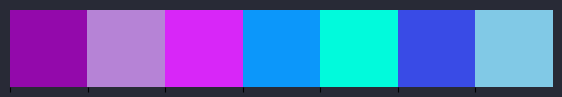

In [3]:
# Colors
YELLOW = "#F7C53E"

CYAN_G = "#0CF7AF"
CYAB_DARK = "#11AB7C"

PURPLE = "#D826F8"
PURPLE_DARJ = "#9309AB"
PURPLE_L = "#b683d6"

BLUE = "#0C97FA"
RED = "#FA1D19"
ORANGE = "#FA9F19"
GREEN = "#0CFA58"
LIGTH_BLUE = "#01FADC"
S_BLUE = "#81c9e6"
DARK_BLUE = "#394be6"
# Palettes
PALETTE_2 = [CYAN_G, PURPLE]
PALETTE_3 = [YELLOW, CYAN_G, PURPLE]
PALETTE_4 = [YELLOW, ORANGE, PURPLE, LIGTH_BLUE]
PALETTE_5 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE]
PALETTE_6 = [BLUE, RED, ORANGE, GREEN, LIGTH_BLUE, PURPLE]

# Vaporwave palette by Francesc Oliveras
PALETTE_7 = [PURPLE_DARJ, PURPLE_L, PURPLE, BLUE, LIGTH_BLUE, DARK_BLUE, S_BLUE]
PALETTE_7_C = [PURPLE_DARJ, BLUE, PURPLE, LIGTH_BLUE, PURPLE_L, S_BLUE, DARK_BLUE]
INCLUDE_ORIGINAL = True
SEED = 18
FOLDS = 5
N_SPLITS = 7
sns.palplot(sns.color_palette(PALETTE_7))

# Set Style
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

cmap = mcolors.LinearSegmentedColormap.from_list("", PALETTE_2)
cmap_2 = mcolors.LinearSegmentedColormap.from_list("", [S_BLUE, PURPLE_DARJ])

font_family = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=10), width=1000, height=500))

warnings.filterwarnings('ignore')

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Constants</p>

In [4]:
PATH = "/kaggle/input/playground-series-s4e2"
ORIGINAL_PATH = "/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv"
SUBMISSION_FILENAME = "sample_submission.csv"
TEST_FILENAME = "test.csv"
TRAIN_FILENAME = "train.csv"

TARGET = "NObeyesdad"


SUBMISSION_DIR = os.path.join(PATH, SUBMISSION_FILENAME)
TRAIN_DIR = os.path.join(PATH, TRAIN_FILENAME) 
TEST_DIR = os.path.join(PATH, TEST_FILENAME)
ACG_SC = "micro"


## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Functions</p>

In [5]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (15, 10))
    plt.title(title)
    # sns.heatmap(corr, annot = False, linewidths=.5, fmt=".2f", square=True, mask = mask, cmap=cmap_2)
    if df.shape[1] < 25:
        sns.heatmap(corr, annot=True, linewidths=.5, fmt=".2f", square=True, mask=mask, cmap=cmap_2)
    else:
        sns.heatmap(corr, annot=False, linewidths=.5, square=True, mask=mask, cmap=cmap_2)

    plt.show()

In [6]:
def data_description(df):
    print("Data description")
    print(f"Total number of records {df.shape[0]}")
    print(f'number of features {df.shape[1]}\n\n')
    columns = df.columns
    data_type = []
    
    # Get the datatype of features
    for col in df.columns:
        data_type.append(df[col].dtype)
        
    n_uni = df.nunique()
    # Number of NaN values
    n_miss = df.isna().sum()
    
    names = list(zip(columns, data_type, n_uni, n_miss))
    variable_desc = pd.DataFrame(names, columns=["Name","Type","Unique levels","Missing"])
    print(variable_desc)

In [7]:
def plot_cont(col, ax, color=PALETTE_7[0]):
    sns.histplot(data=comb_df, x=col,
                hue="set",ax=ax, hue_order=labels,
                common_norm=False, **histplot_hyperparams)
    
    ax_2 = ax.twinx()
    ax_2 = plot_cont_dot(
        comb_df.query('set=="train"'),
        col, TARGET, ax_2,
        color=color
    )
    
    ax_2 = plot_cont_dot(
        comb_df, col,
        TARGET, ax_2,
        color=color
    )

In [8]:
def encode_categorical_columns(df, target_column=TARGET):
    df_encoded = df.copy()
    label_mappings = {}

    # Codificación de etiquetas para la columna objetivo
    if target_column in df_encoded.columns:
        label_encoder = LabelEncoder()
        df_encoded[target_column] = label_encoder.fit_transform(df_encoded[target_column])
        label_mappings = {index: label for index, label in enumerate(label_encoder.classes_)}

    # Codificación One-Hot para las demás variables categóricas
    df_encoded = pd.get_dummies(df_encoded, drop_first=True)

    # Añadiendo una columna para los mapeos de etiquetas
    if label_mappings:
        df_encoded['Label_Mappings'] = [label_mappings] * len(df_encoded)

    return df_encoded

In [9]:
def encode_categorical_and_boolean_columns(df, target_column=TARGET):
    df_encoded = df.copy()
    label_mappings = {}

    # Identificando columnas booleanas y categóricas
    bool_columns = df_encoded.select_dtypes(include=['bool']).columns
    categorical_columns = df_encoded.select_dtypes(include=['object', 'category']).columns

    # Codificación de etiquetas para las columnas booleanas
    for col in bool_columns:
        label_encoder = LabelEncoder()
        df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
        label_mappings[col] = {index: label for index, label in enumerate(label_encoder.classes_)}

    # Codificación de etiquetas para la columna objetivo
    if target_column in df_encoded.columns:
        label_encoder = LabelEncoder()
        df_encoded[target_column] = label_encoder.fit_transform(df_encoded[target_column])
        label_mappings[target_column] = {index: label for index, label in enumerate(label_encoder.classes_)}

    # Codificación One-Hot para las demás variables categóricas
    df_encoded = pd.get_dummies(df_encoded, columns=[col for col in categorical_columns if col != target_column], drop_first=True)

    # Añadiendo una columna para los mapeos de etiquetas
    if label_mappings:
        df_encoded['Label_Mappings'] = [label_mappings] * len(df_encoded)

    return df_encoded

In [10]:
def plot_histogram(df, palette=PALETTE_7_C, title="Histogram"):
    # Seleccionando solo las columnas numéricas
    num_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Número de filas/columnas para la cuadrícula de gráficos
    n_rows = len(num_columns) // 3 + (len(num_columns) % 3 > 0)
    n_cols = 3

    # Creando una cuadrícula de gráficos
    plt.figure(figsize=(15, 5 * n_rows))
    # Seleccionando solo las columnas numéricas
    num_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Número de filas/columnas para la cuadrícula de gráficos
    n_rows = len(num_columns) // 3 + (len(num_columns) % 3 > 0)
    n_cols = 3

    # Creando una cuadrícula de gráficos
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    fig.suptitle(title, fontsize=20)

    for i, col in enumerate(num_columns):
        ax = axes[i//n_cols, i%n_cols]
        
        # Datos para el histograma
        data = df[col]
        counts, bins = np.histogram(data, bins=30)

        # Aplicando la paleta de colores personalizada a cada barra
        for j in range(len(bins)-1):
            color = palette[j % len(palette)]
            ax.bar(bins[j], counts[j], color=color, width=bins[j+1]-bins[j])

        ax.set_title(f'Histogram of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

    # Ajustando el layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

In [11]:
def plot_scatterplots(df, palette, title):
    """
    Generate all possible scatter plots for numerical columns in the dataframe.

    :param df: pandas DataFrame
    :param palette: seaborn color palette
    :param title: str, title for the plot set
    """
    # Identify numeric columns in the DataFrame
    numeric_cols = df.select_dtypes(include='number').columns

    # Generate all possible pairs of numeric columns
    pairs = list(combinations(numeric_cols, 2))

    # Calculate the number of plots and define the grid size
    n = len(pairs)
    n_cols = 3  # number of columns in the subplot
    n_rows = n // n_cols + (n % n_cols > 0)  # ensure enough rows to accommodate all plots

    # Create the subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
    fig.suptitle(title, fontsize=16)
    axes = axes.flatten()

    # Plot each pair
    for i, pair in enumerate(pairs):
        sns.scatterplot(data=df, x=pair[0], y=pair[1], ax=axes[i], palette=palette)

        # Hide empty subplots
        for j in range(i+1, len(axes)):
            axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

In [12]:
def score_vis(pred, y_test, title="cmp"):
    score = accuracy_score(y_test, pred)
    print(f"{title} Score: ", score)
    cfm = confusion_matrix(y_test, pred)
    sns.heatmap(cfm, annot=True, fmt="d")
    plt.show()

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Import data</p>

In [13]:
train_df = pd.read_csv(TRAIN_DIR)
test_df = pd.read_csv(TEST_DIR)
original_df = pd.read_csv(ORIGINAL_PATH)
submission_df = pd.read_csv(SUBMISSION_DIR)

ids = test_df["id"]

train_df = pd.concat([train_df, original_df], ignore_index=True)

In [14]:
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns
unique_counts = {col: train_df[col].nunique() for col in categorical_columns}

In [15]:
data_description(train_df)
data_description(test_df)
data_description(original_df)

Data description
Total number of records 22869
number of features 18


                              Name     Type  Unique levels  Missing
0                               id  float64          20758     2111
1                           Gender   object              2        0
2                              Age  float64           1739        0
3                           Height  float64           1862        0
4                           Weight  float64           2014        0
5   family_history_with_overweight   object              2        0
6                             FAVC   object              2        0
7                             FCVC  float64            975        0
8                              NCP  float64            740        0
9                             CAEC   object              4        0
10                           SMOKE   object              2        0
11                            CH2O  float64           1568        0
12                             SCC   object  

In [16]:
train_df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0.0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1.0,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2.0,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3.0,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4.0,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [17]:
train_df = train_df.drop(["id"], axis=1)
test_df = test_df.drop(["id"], axis=1)

In [18]:
# train_df_c = encode_categorical_columns(train_df)
# test_df_c = encode_categorical_columns(test_df)

In [19]:
train_df_c = encode_categorical_and_boolean_columns(train_df)
test_df_c = encode_categorical_and_boolean_columns(test_df)

In [20]:
train_df_c

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Male,...,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Label_Mappings
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,6,True,...,False,False,False,True,False,False,False,True,False,"{'NObeyesdad': {0: 'Insufficient_Weight', 1: '..."
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,False,...,False,False,False,False,True,False,False,False,False,"{'NObeyesdad': {0: 'Insufficient_Weight', 1: '..."
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,False,...,False,False,False,False,True,False,False,True,False,"{'NObeyesdad': {0: 'Insufficient_Weight', 1: '..."
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,4,False,...,False,False,False,True,False,False,False,True,False,"{'NObeyesdad': {0: 'Insufficient_Weight', 1: '..."
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,6,True,...,False,False,False,True,False,False,False,True,False,"{'NObeyesdad': {0: 'Insufficient_Weight', 1: '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22864,20.976842,1.710730,131.408528,3.000000,3.000000,1.728139,1.676269,0.906247,4,False,...,False,False,False,True,False,False,False,True,False,"{'NObeyesdad': {0: 'Insufficient_Weight', 1: '..."
22865,21.982942,1.748584,133.742943,3.000000,3.000000,2.005130,1.341390,0.599270,4,False,...,False,False,False,True,False,False,False,True,False,"{'NObeyesdad': {0: 'Insufficient_Weight', 1: '..."
22866,22.524036,1.752206,133.689352,3.000000,3.000000,2.054193,1.414209,0.646288,4,False,...,False,False,False,True,False,False,False,True,False,"{'NObeyesdad': {0: 'Insufficient_Weight', 1: '..."
22867,24.361936,1.739450,133.346641,3.000000,3.000000,2.852339,1.139107,0.586035,4,False,...,False,False,False,True,False,False,False,True,False,"{'NObeyesdad': {0: 'Insufficient_Weight', 1: '..."


In [21]:
label_mapping = train_df_c.Label_Mappings[0]
train_df_c = train_df_c.drop(["Label_Mappings"], axis=1)

In [22]:
label_mapping

{'NObeyesdad': {0: 'Insufficient_Weight',
  1: 'Normal_Weight',
  2: 'Obesity_Type_I',
  3: 'Obesity_Type_II',
  4: 'Obesity_Type_III',
  5: 'Overweight_Level_I',
  6: 'Overweight_Level_II'}}

In [23]:
# all_df = features_engineering(all_df)
# train_df = features_engineering(train_df)
# test_df = features_engineering(test_df)

In [24]:
train_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">EDA and data modification</p>

<Axes: >

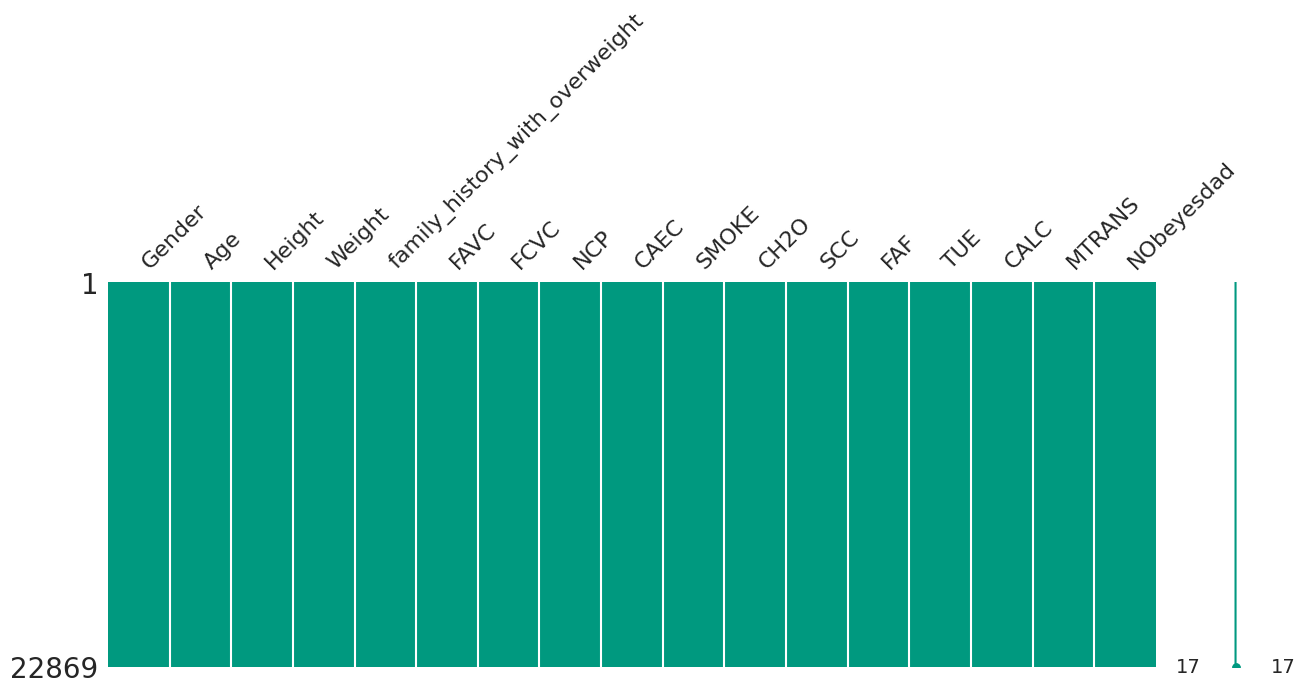

In [25]:
msno.matrix(df=train_df, figsize=(15,5), color=(0,0.6,0.5))

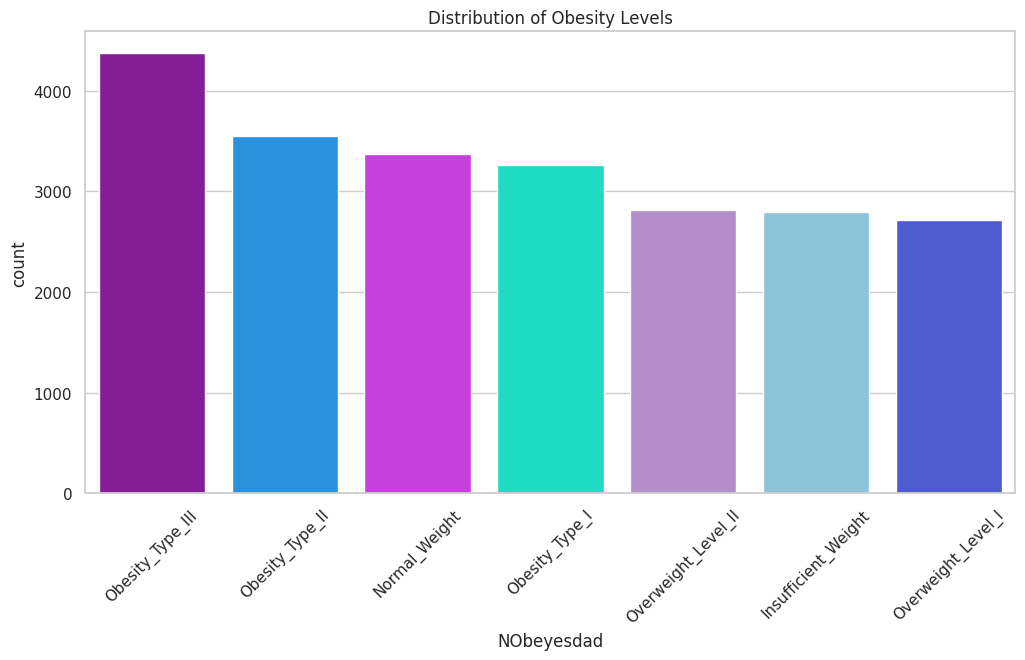

In [26]:
# Setting the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of Obesity Levels
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x=TARGET, order = train_df[TARGET].value_counts().index, palette=PALETTE_7_C)
plt.title('Distribution of Obesity Levels')
plt.xticks(rotation=45)
plt.show()

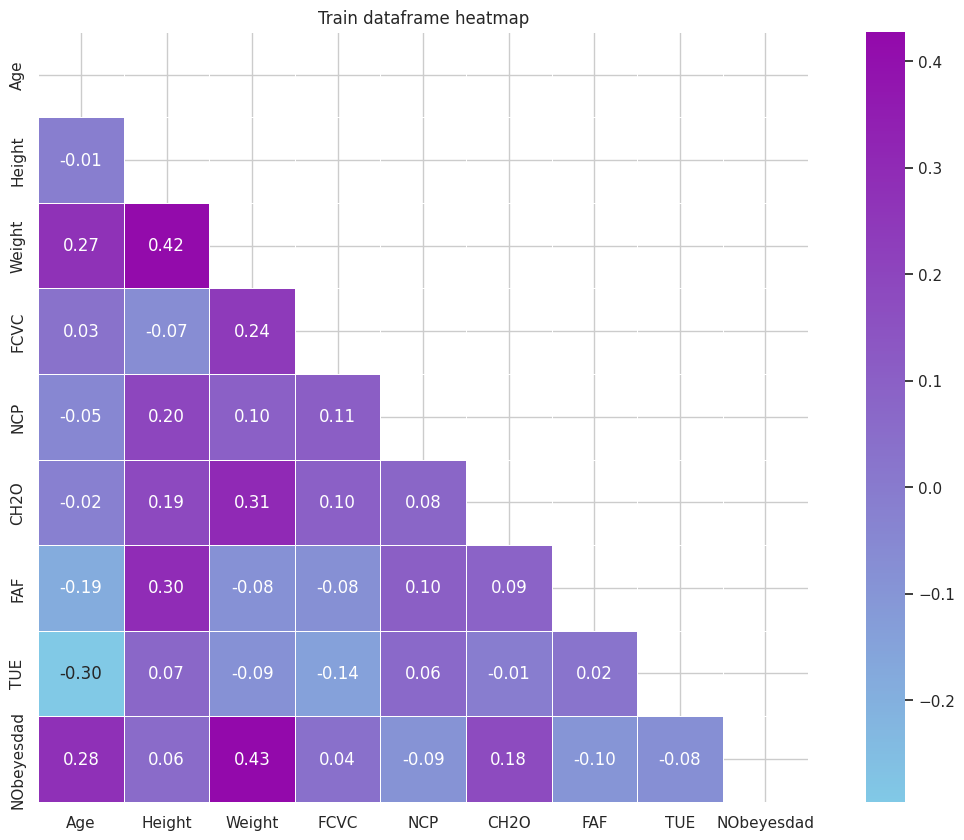

None

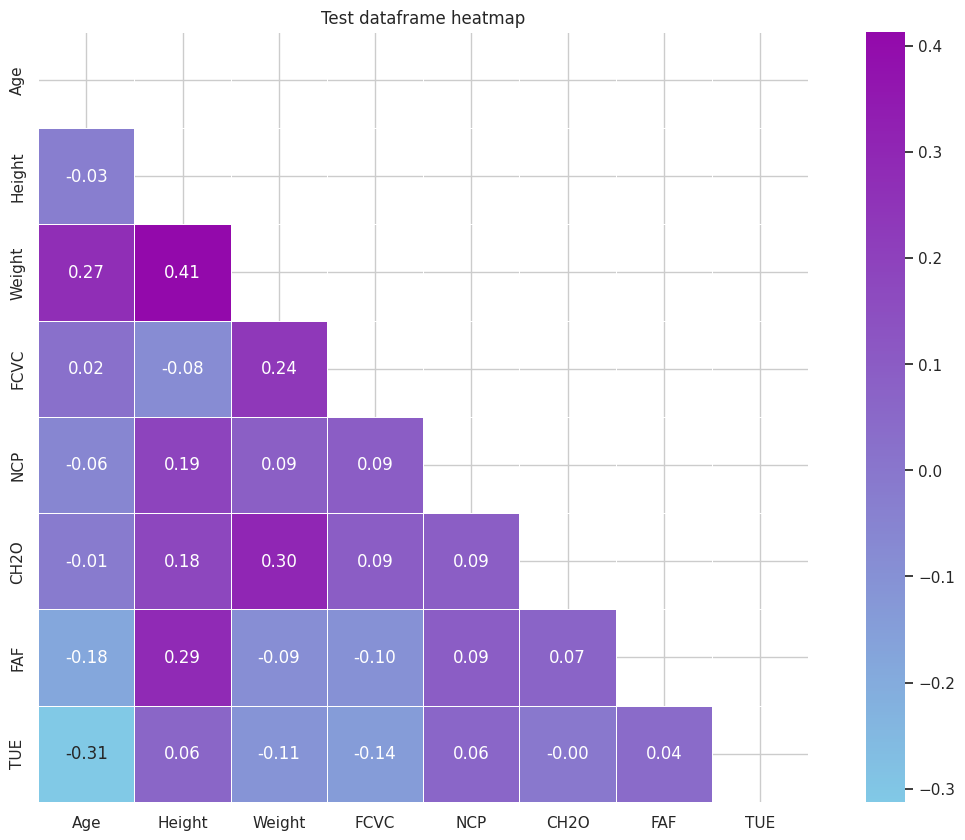

None

In [27]:
train_df_n = train_df_c.select_dtypes(include=['number'])
display(show_corr_heatmap(train_df_n, "Train dataframe heatmap"))
test_df_n = test_df.select_dtypes(include=['number'])
display(show_corr_heatmap(test_df_n, "Test dataframe heatmap"))

<Figure size 1500x1500 with 0 Axes>

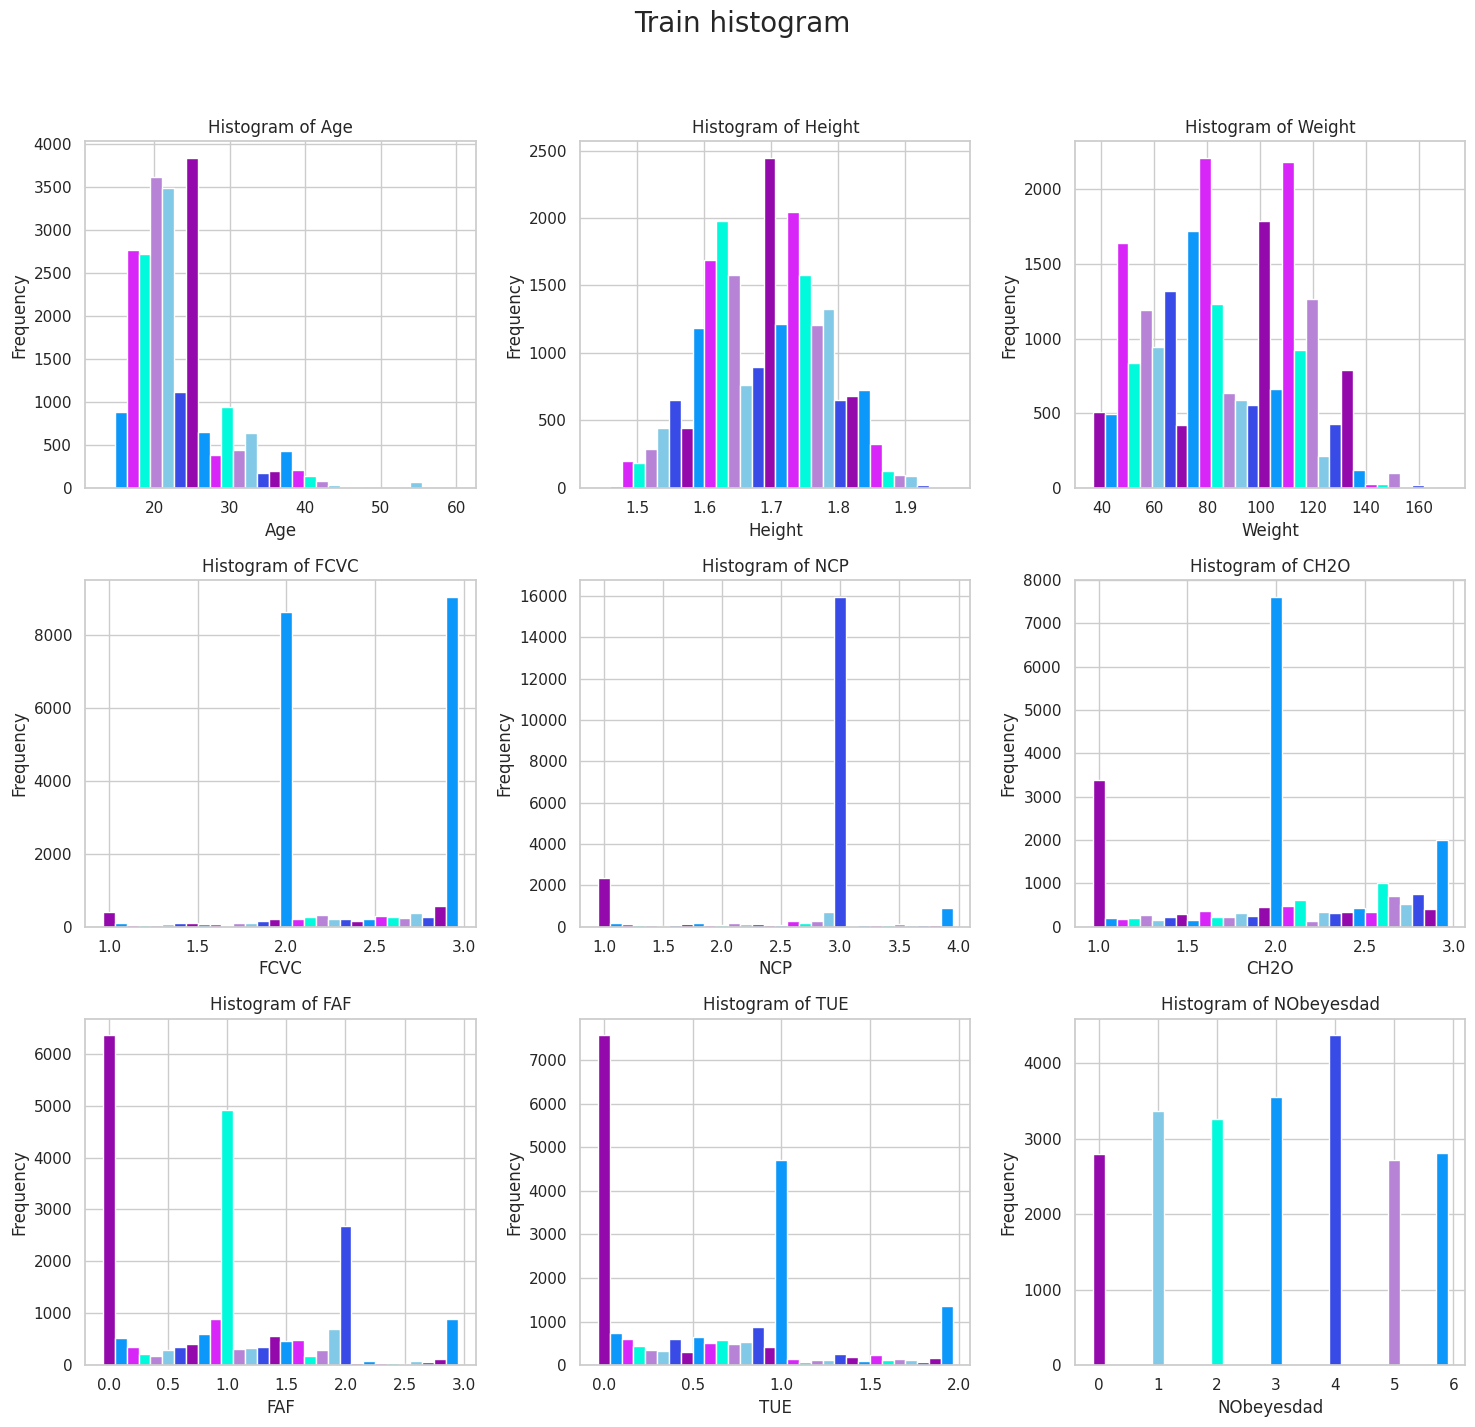

<Figure size 1500x1500 with 0 Axes>

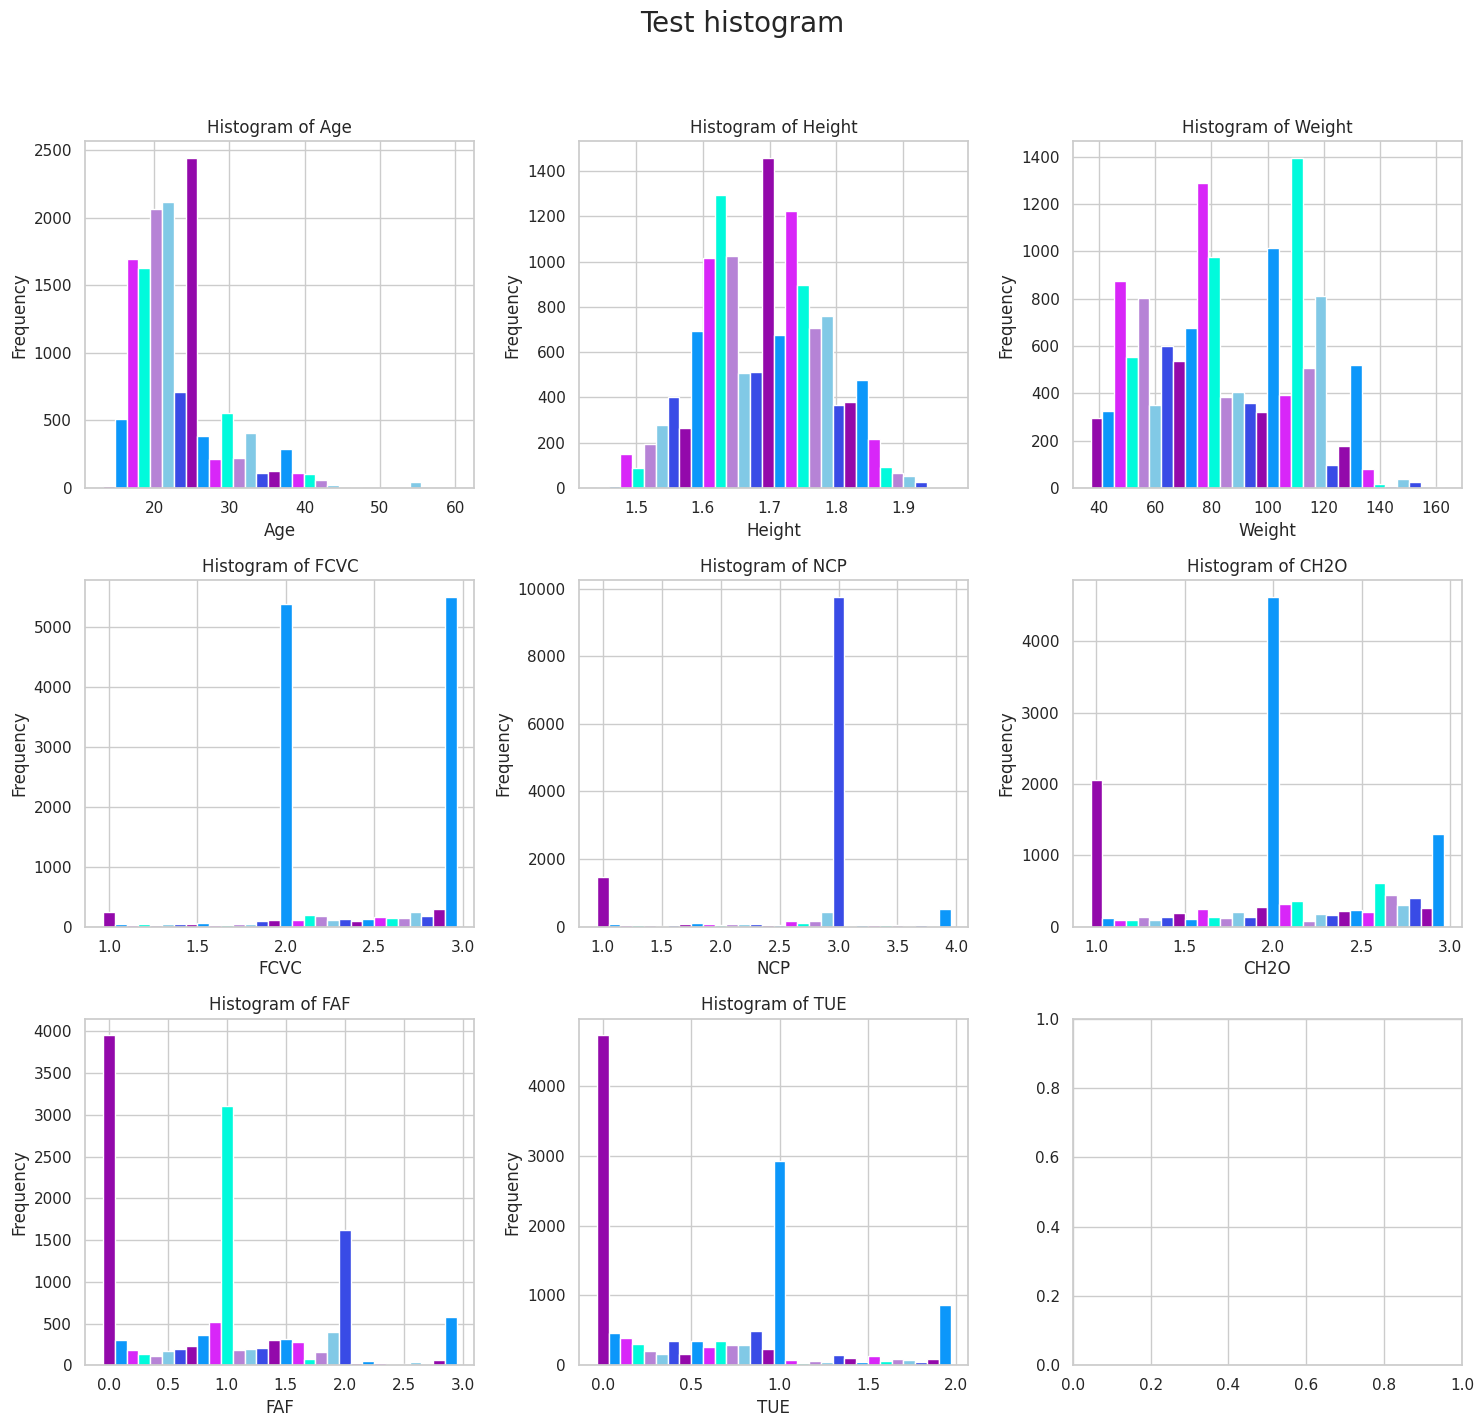

In [28]:
plot_histogram(train_df_c, PALETTE_7_C, "Train histogram")
plot_histogram(test_df_c, PALETTE_7_C, "Test histogram")

In [29]:
# plot_scatterplots(train_df, PALETTE_7_C, "Train scatterplot")
# plot_scatterplots(test_df, PALETTE_7_C, "Test scatterplot")

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Model</p>

In [30]:
X = train_df_c.drop(TARGET, axis=1)
y = train_df_c[TARGET]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [32]:
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
13715,21.207423,1.747739,50.000000,2.332074,3.471536,2.453384,1.586525,0.000000,False,False,...,False,False,False,False,False,True,False,False,True,False
11550,32.787101,1.721854,74.959747,2.882522,1.000000,1.000000,0.000000,0.000000,True,True,...,False,False,False,False,True,False,False,False,False,False
16422,26.740655,1.867140,121.835883,3.000000,3.000000,2.816015,1.284798,0.000000,True,True,...,False,False,False,False,True,False,False,False,True,False
17795,21.652229,1.700181,75.057177,2.021446,3.546352,1.453626,0.992717,0.096982,True,True,...,False,False,False,False,True,False,False,False,True,False
3102,18.000000,1.620000,58.000000,2.000000,3.000000,2.000000,1.000000,1.000000,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8524,18.000000,1.600000,51.000000,3.000000,3.000000,1.000000,2.000000,1.000000,False,False,...,False,False,True,False,True,False,False,False,True,False
415,26.000000,1.800000,72.000000,3.000000,3.000000,2.000000,2.000000,0.000000,True,False,...,False,False,False,False,True,False,False,False,True,False
7071,21.709159,1.637537,70.000000,2.457547,1.000000,1.000000,1.732090,0.000000,True,False,...,True,False,False,False,False,True,False,False,True,False
265,19.058511,1.662017,49.838965,1.492500,3.590039,1.049134,2.000000,1.000000,False,False,...,False,False,False,False,True,False,False,False,True,False


In [33]:
clf = RandomForestClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
pred_1 = clf.predict(X_test)

Random Forest Class Score:  0.89986882378662


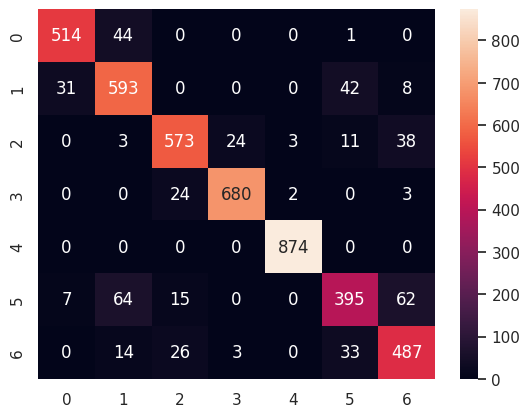

In [34]:
score_vis(pred_1, y_test, "Random Forest Class")

In [35]:
clf = XGBClassifier(n_jobs=-1)
clf.fit(X_train, y_train)
pred_2 = clf.predict(X_test)

XGBClassifier Score:  0.89986882378662


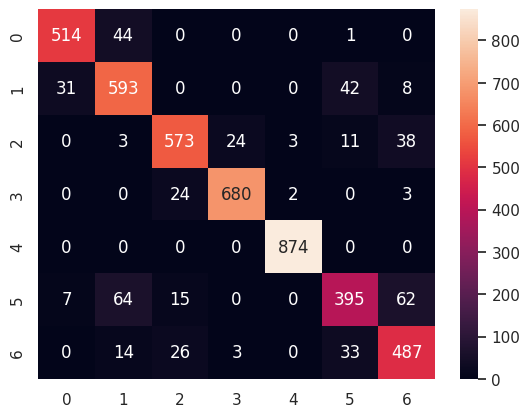

In [36]:
score_vis(pred_1, y_test, "XGBClassifier")

In [37]:
clf = XGBClassifier(n_jobs=-1)
clf.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [38]:
pred = clf.predict(test_df_c)

## <p style="font-family:Consolas Mono; font-weight:normal; letter-spacing: 2px; color:#06D1C7; font-size:130%; text-align:left;padding: 0px; border-bottom: 3px solid #008F77">Submission</p>

In [39]:
label_mapping

{'NObeyesdad': {0: 'Insufficient_Weight',
  1: 'Normal_Weight',
  2: 'Obesity_Type_I',
  3: 'Obesity_Type_II',
  4: 'Obesity_Type_III',
  5: 'Overweight_Level_I',
  6: 'Overweight_Level_II'}}

In [40]:
pred

array([3, 5, 4, ..., 0, 1, 3])

In [41]:
submission_df

,id,NObeyesdad
0,20758,Normal_Weight
1,20759,Normal_Weight
2,20760,Normal_Weight
3,20761,Normal_Weight
4,20762,Normal_Weight
...,...,...
13835,34593,Normal_Weight
13836,34594,Normal_Weight
13837,34595,Normal_Weight
13838,34596,Normal_Weight


In [42]:
submission_df[TARGET] = pred

In [43]:
submission_df[TARGET] = submission_df[TARGET].map({
    0: "Insufficient_Weight",
    1: "Normal_Weight",
    2: "Obesity_Type_I",
    3: "Obesity_Type_II",
    4: "Obesity_Type_III",
    5: "Overweight_Level_I",
    6: "Overweight_Level_II"
})

submission_df.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III


In [44]:
submission_df.to_csv("submission.csv")

## Thanks for your support, the notebook is still in process, the model will be uploaded soon.